In [1]:
import numpy as np
import ants

In [2]:
#import warnings
#warnings.filterwarnings('ignore')

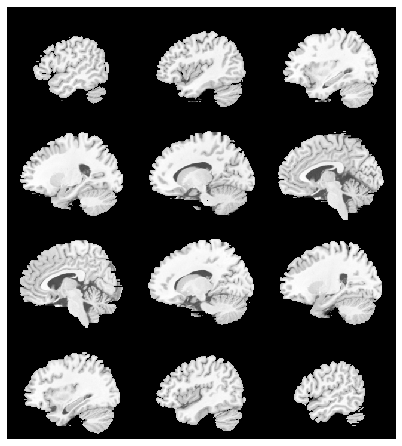

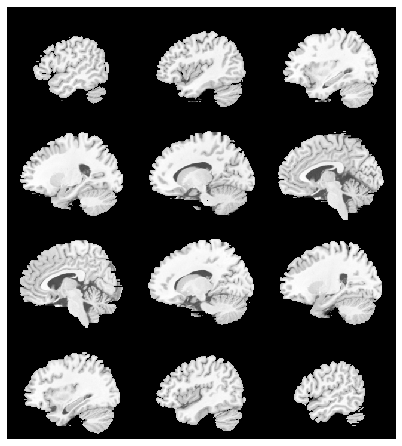

In [3]:
fi = ants.image_read(ants.get_ants_data('ch2')).clone("float")
mi = ants.image_read(ants.get_ants_data('ch2')).clone("float")
fi.plot()
mi.plot()

In [4]:
fi

ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (181, 217, 181)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (90.0, 125.0, -71.0)
	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

In [5]:
mi

ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (181, 217, 181)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (90.0, 125.0, -71.0)
	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

In [6]:
reg = ants.registration(fi, mi, type_of_transform="SyNRA")

In [7]:
reg

{'warpedmovout': ANTsImage (LPI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (181, 217, 181)
 	 Spacing    : (1.0, 1.0, 1.0)
 	 Origin     : (90.0, 125.0, -71.0)
 	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.],
 'warpedfixout': ANTsImage (LPI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (181, 217, 181)
 	 Spacing    : (1.0, 1.0, 1.0)
 	 Origin     : (90.0, 125.0, -71.0)
 	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.],
 'fwdtransforms': ['/var/folders/1g/0yylg_z95lx5zcn3dpkgb9tr0000gn/T/tmp9bhhe_ew1Warp.nii.gz',
  '/var/folders/1g/0yylg_z95lx5zcn3dpkgb9tr0000gn/T/tmp9bhhe_ew0GenericAffine.mat'],
 'invtransforms': ['/var/folders/1g/0yylg_z95lx5zcn3dpkgb9tr0000gn/T/tmp9bhhe_ew0GenericAffine.mat',
  '/var/folders/1g/0yylg_z95lx5zcn3dpkgb9tr0000gn/T/tmp9bhhe_ew1InverseWarp.nii.gz']}

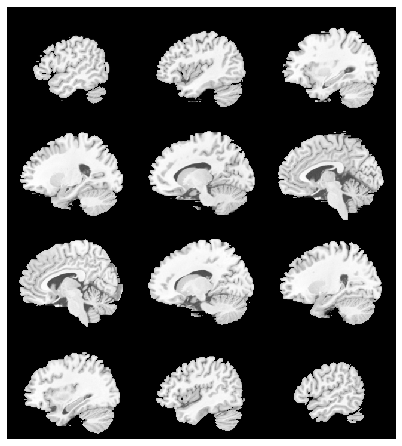

In [8]:
ants.plot(reg['warpedmovout'])

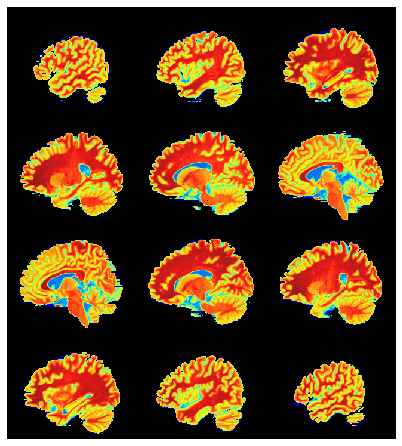

In [9]:
ants.plot(fi, reg['warpedmovout'])

In [10]:
fi_np = fi.numpy()
mi_np = mi.numpy()
warped = reg["warpedmovout"].clone("float")
warped_np = warped.numpy()

In [11]:
print(fi_np.shape)
print(mi_np.shape)
print(warped_np.shape)

(181, 217, 181)
(181, 217, 181)
(181, 217, 181)


# Mutual Information
Lower is better

In [12]:
minfo = ants.image_mutual_information(fi, fi) 
print(minfo)

-0.9790684902095449


In [13]:
minfo = ants.image_mutual_information(fi, mi)
print(minfo)

-0.9790684902095449


In [14]:
minfo = ants.image_mutual_information(fi, warped)
print(minfo)

-0.9704386404563945


# PSNR
Higher is better. Inf for perfect match.

In [15]:
import skimage
from skimage.metrics import peak_signal_noise_ratio as psnr

In [16]:
psnrval = psnr(fi_np,fi_np, data_range=255.0)
print(psnrval)

inf


/Users/narender/opt/anaconda3/lib/python3.7/site-packages/skimage/metrics/simple_metrics.py:160: RuntimeWarning:

divide by zero encountered in double_scalars



In [17]:
psnrval = psnr(fi_np,mi_np, data_range=255.0)
print(psnrval)

inf


In [18]:
psnrval = psnr(fi_np,warped_np, data_range=255.0)
print(psnrval)

49.32089677209581


# SSIM
Higher is better. Values lie between -1 and 1. 1 means perfect match.

In [19]:
#import skimage
#from skimage import measure
from skimage.metrics import structural_similarity as s_sim

In [20]:
ssim = s_sim(fi_np, fi_np)
print(ssim)

1.0


In [21]:
ssim = s_sim(fi_np, mi_np)
print(ssim)

1.0


In [22]:
ssim = s_sim(fi_np, warped_np)
print(ssim)

0.9923436107870683


# Hausdorff Distance
Lower is better

In [23]:
from skimage.metrics import hausdorff_distance as h_dis

In [24]:
hdis = h_dis(fi_np, fi_np)
print(hdis)

0.0


In [25]:
hdis = h_dis(fi_np, mi_np)
print(hdis)

0.0


In [26]:
hdis = h_dis(fi_np, warped_np)
print(hdis)

1.7320508075688772


# MSE
Lower is better.

In [27]:
from skimage.metrics import mean_squared_error as mse

In [28]:
mseval = mse(fi_np, fi_np)
print(mseval)

0.0


In [29]:
mseval = mse(fi_np, mi_np)
print(mseval)

0.0


In [30]:
mseval = mse(fi_np, warped_np)
print(mseval)

0.7603099668471547


# NRMSE
Lower is better

In [31]:
from skimage.metrics import normalized_root_mse as nrmse

In [32]:
nrmseval = nrmse(fi_np, fi_np)
print(nrmseval)

0.0


In [33]:
nrmseval = nrmse(fi_np, mi_np)
print(nrmseval)

0.0


In [34]:
nrmseval = nrmse(fi_np, warped_np)
print(nrmseval)

0.018916621669596012


# Histogram

In [35]:
#import cv2 
from matplotlib import pyplot as plt 
#img = cv2.imread('ex.jpg',0) 
  

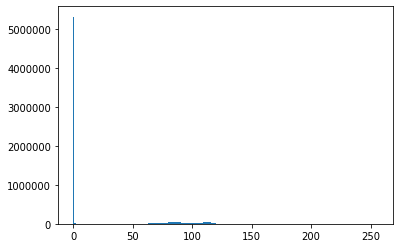

In [36]:
# alternative way to find histogram of an image 
plt.hist(warped_np.ravel(),256,[0,256]) 
plt.show()